# 1.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/Machine Learning Lab/fraudTest.csv")

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# 2.) Select four columns to use as features (one just be trans_date_trans)

In [5]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

In [6]:
df_select.columns

Index(['trans_date_trans_time', 'category', 'amt', 'city_pop', 'is_fraud'], dtype='object')

# 3.) Create a your own variable out of trans_date. Create dummies for factor vars

In [7]:
type(df_select["trans_date_trans_time"][0])

str

In [8]:
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])

<ipython-input-8-99f721e4ce0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])


In [10]:
df_select["trans_date_trans_time"][0]

Timestamp('2020-06-21 12:14:25')

In [11]:
df_select["time_var"] = [i.month for i in df_select["trans_date_trans_time"]]

<ipython-input-11-b1a497fe803c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.month for i in df_select["trans_date_trans_time"]]


In [12]:
df_select["time_var"][0]

6

In [13]:
X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

In [14]:
X.head()

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,333497,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29.84,302,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.28,34496,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60.05,54767,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.19,1126,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# XXX SKIP THIS WE WILL TALK ABOUT NEXT CLASS

In [ ]:
resample_X = X
resample_y = y

# 5.) Train a Logistic regression.

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
log_reg = LogisticRegression().fit(X_normalized, y)

In [21]:
y_pred = log_reg.predict(X_normalized)

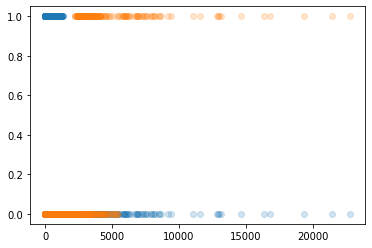

In [37]:
import matplotlib.pyplot as plt
plt.scatter(X.amt, y, alpha = 0.2)
plt.scatter(X.amt, y_pred, alpha = 0.2)
plt.show()

In [32]:
print("Accuracy:", log_reg.score(X_normalized, y))

Accuracy: 0.9958540197473903


# 6.) The company you are working for wants to target at a False Positive rate of 5% what threshold should you use? (Use oversampled data)

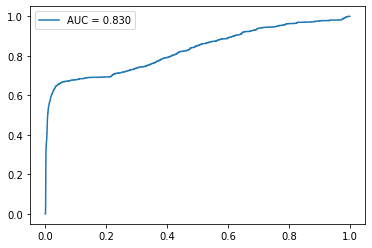


 threshold: 0.010570057941082086


In [43]:
# ASK chatgpt
# If you dont like the code ask in a different way
from sklearn.metrics import roc_auc_score, roc_curve

#predict the probability of the positive class
y_pred = log_reg.predict_proba(X_normalized)[:,1]

#calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred)

#calculate the AUC
auc = roc_auc_score(y, y_pred)

#plot the ROC curve
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc))
plt.legend(loc='best')
plt.show()

#adjust the threshold to target a specific False Positive percentage
desired_fpr = 0.05 
threshold = thresholds[np.argmin(abs(fpr - desired_fpr))]
y_pred = (y_pred > threshold).astype(int)
print('\n threshold:', threshold)

# 7.) If the company makes .02*amt on True transactions and loses -amt on False (Use original data)

In [44]:
df_temp = df_select.copy()

In [54]:
# make prediction using threshold calculated in question 6.)
pred1 = log_reg.predict_proba(X_normalized)[:,1]
df_temp["pred"] = [1 if prob > threshold else 0 for prob in pred1]

In [55]:
df_temp = df_temp[["pred", "is_fraud", "amt"]]

In [56]:
df_temp.head()

,pred,is_fraud,amt
0,0,0,2.86
1,0,0,29.84
2,0,0,41.28
3,0,0,60.05
4,0,0,3.19


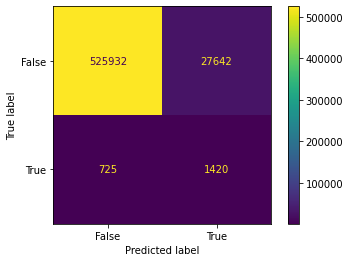

In [57]:
# The answer should be one single number
from sklearn import metrics
cm = metrics.confusion_matrix(df_temp.is_fraud, df_temp.pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
                                            display_labels = [False, True])
cm_display.plot()
plt.show()

In [101]:
df_temp['tp'] = 0
df_temp.loc[(df_temp['is_fraud'] == 1) & (df_temp['pred'] == 1), 'tp'] = 1
df_temp['fp'] = 0
df_temp.loc[(df_temp['is_fraud'] == 0) & (df_temp['pred'] == 1), 'fp'] = 1
df_temp['fn'] = 0
df_temp.loc[(df_temp['is_fraud'] == 1) & (df_temp['pred'] == 0), 'fn'] = 1
df_temp['tn'] = 0
df_temp.loc[(df_temp['is_fraud'] == 0) & (df_temp['pred'] == 0), 'tn'] = 1
#sum(df_temp['fn'])

In [109]:
df_temp

,pred,is_fraud,amt,tp,fp,fn,tn
0,0,0,2.86,0,0,0,1
1,0,0,29.84,0,0,0,1
2,0,0,41.28,0,0,0,1
3,0,0,60.05,0,0,0,1
4,0,0,3.19,0,0,0,1
...,...,...,...,...,...,...,...
555714,0,0,43.77,0,0,0,1
555715,0,0,111.84,0,0,0,1
555716,0,0,86.88,0,0,0,1
555717,0,0,7.99,0,0,0,1


In [108]:
rev = (0.02 * df_temp.tn * df_temp.amt - df_temp.fn * df_temp.amt).sum()
rev

503902.21540000004

# 8.) Using Logistic Regression Lasso to inform you. Would you use the selected features in a trusted prediction model?

In [113]:
log_reg = LogisticRegression(penalty = 'l1', solver='liblinear', max_iter = 10000).fit(X_normalized, y)

In [ ]:
# If most or all your variables go to 0 => Your data is garbage
# The regularization will tell us if our model has significance
# This of using coefficient strength similar to r^2

In [114]:
log_reg.coef_

array([[ 0.32943469, -0.12171798, -0.19430591, -0.06806798, -0.07689206,
         0.10734148,  0.02470892,  0.43041277, -0.06858713, -0.11246723,
        -0.09705809,  0.32538422,  0.        , -0.00953394,  0.40820121,
         0.10529058, -0.90803556]])

Because the Logistic Regression Lasso result shows that only one of the dummy variable created from factor variable $category$ have the coefficient 0 and the others are all non-zeros, I will use all of these selected features in a trusted prediction model. 